<a href="https://colab.research.google.com/github/sdkchris/Projects/blob/main/KNN_algorithm_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k-nearest neighbors algorithm implementation (KNN)


k-NN is a type of classification where the function is only approximated locally. 
In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). 
If k = 1, then the object is simply assigned to the class of that single nearest neighbor. [wikipedia.com/knn]

In [1]:
#import dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [27]:
# Load dataset

iris = datasets.load_iris()
# Create a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
X = iris.data
df.sample(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
17,5.1,3.5,1.4,0.3,0
58,6.6,2.9,4.6,1.3,1
102,7.1,3.0,5.9,2.1,2
87,6.3,2.3,4.4,1.3,1
44,5.1,3.8,1.9,0.4,0
7,5.0,3.4,1.5,0.2,0
24,4.8,3.4,1.9,0.2,0
48,5.3,3.7,1.5,0.2,0
133,6.3,2.8,5.1,1.5,2
124,6.7,3.3,5.7,2.1,2


In [31]:
# let's shuffle the data with sklearn function shuffle()
from sklearn.utils import shuffle

df = shuffle(df)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
63,6.1,2.9,4.7,1.4,1
49,5.0,3.3,1.4,0.2,0
27,5.2,3.5,1.5,0.2,0
110,6.5,3.2,5.1,2.0,2
20,5.4,3.4,1.7,0.2,0


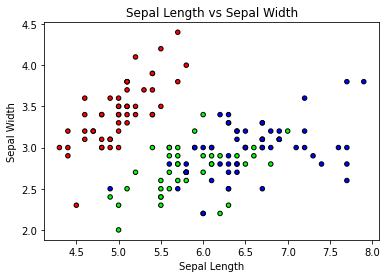

In [32]:
# Plotting the first two features (Sepal Length and Sepal Width)
from matplotlib.colors import ListedColormap

# We can also load the same dataset from sklearn
data = datasets.load_iris()
x,y = data.data, data.target
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# plot two features 
plt.figure()
plt.scatter(x[:,0],x[:,1], cmap=cmap, edgecolors='k',c=y, s=20)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Split data into a train and a test split (70% and 30% respectively)


In [33]:
# Splitting the data into training and testing
def train_test_split(dataset,frac):
    size = dataset.shape[0]
    proportion = round(size*frac)
    train_data = dataset.iloc[:proportion]
    test_data = dataset.iloc[proportion+1:]
    return train_data, test_data

In [34]:
train_data, test_data = train_test_split(df,.7)

In [36]:
y_train = train_data['target']
x_train = train_data.drop(['target'],axis  = 1)

y_test = test_data['target']
x_test = test_data.drop(['target'],axis = 1)

In [37]:
x_train = pd.DataFrame(x_train)

In [38]:
x_test.shape

(44, 4)

## KNN

Implement a similarity (or a distance) measure. To begin with you can implement
the Euclidean Distance. 

**Formula:**

<img src="https://www.gstatic.com/education/formulas2/397133473/en/euclidean_distance.svg" title="euclidien" width="250"/>


* p,q	=	two points in Euclidean n-space
* q_i, p_i	=	Euclidean vectors, starting from the origin of the space (initial point)
* n	=	n-space

In [45]:
"""We'll compute the similaritiy between two instances by calculating 
    their Euclidian distance. The function below is 
    used to calculate the Euclidean Distance between two variables."""
def euclidean_distance(data_pt1, data_pt2):
    
    distance = np.sqrt(((data_pt1 - data_pt2).sum())**2)  #compute euclidean distance
    
    return distance

Implement a function that returns top K Nearest Neighbors for a given query (data point)


In [51]:
"""To determine the top K Nearest Neighbour, by using the Euclidean Distance,
the function below has been implemented. The function takes as 
parameter the target data points, the training dataset and K values, 
which represent the number of nearest neighbours. It then returns a 
list of the Top K nearest neighbour based on the K closest neighbour since 
we are using Euclidean Distance.
"""
import operator
from operator import itemgetter

def get_K_NN(target_point, training_set,k):
    #takes as input:
    #target_point: target data point
    #training_set: training dataset
    #K: number of K nearest Neighbour to return
    #returns: list of K nearest Neighbour with their index
    distance_list = []
    
    for index, row in training_set.iterrows():#for each individual instance in the training dataset
        distance = euclidean_distance(target_point,row)#calculate euclidian distance 
        distance_list.append([index,distance])#add the index and the distance to the list 
    
    # now we sort the distance list
    distance_list.sort(key=operator.itemgetter(1))#A function that grabs the first item from a list object.
    
    # return k neighbors with the smallest distances 
    return np.array(distance_list[0:k])

Ref: https://docs.python.org/2/howto/sorting.html

### Prediction 


We will predict the class using majority voting. 
To determine the class based on majority voting, the function below has been implemented. It finds the class of target variable based on each top K nearest neighbour's class.


In [47]:
"""The funtion takes as parameter the list of top K nearest neighbour from the 
function get_K_NN and returns the predicted Class based on the majority voting."""

def get_votes(neighbour_list):
    majority_vote = {}#dict that will contain all the votes 
    
    for vote in neighbour_list:
        majority_vote[vote] = majority_vote.get(vote,0)+1 #here, we count votes per class
    
    pred = sorted(majority_vote.items(),key=lambda x:x[1], reverse = True)
    
    #returns the highest vote count
    return pred[0][0]


The funciton bellow ties up all the functions we've defined so far and preforms predictions. It takes as input the target datapoint, the training set and the number of neighbors and returns a predicted class of the target.  

In [48]:
def predict_class(traget, x_train,y_train,K):
    
    #first we get top k nearest neighbours 
    nearest_neighbours = get_K_NN(target, x_train,K)
    
    #process votes for each neighbouring point
    neighbour_class = y_train[[i for i in (nearest_neighbours[:,0])]]
    
    #get prediction
    pred = get_votes(neighbour_class)
    
    return pred

### Predict label of a point

In [49]:
target = x_test.iloc[13]
target

sepal length (cm)    4.7
sepal width (cm)     3.2
petal length (cm)    1.6
petal width (cm)     0.2
Name: 29, dtype: float64

In [52]:
# Let's predict its class by getting top 10 neighbours first 

top_neighbours = get_K_NN(target,x_train,10)


In [53]:
for i in range(0,len(top_neighbours)):
    print('Nearest neighbour {}: {} ---> Distance to target: {}'.format(i+1, top_neighbours[i][0],top_neighbours[i][1]))

Nearest neighbour 1: 30.0 ---> Distance to target: 4.440892098500626e-16
Nearest neighbour 2: 6.0 ---> Distance to target: 9.992007221626409e-16
Nearest neighbour 3: 9.0 ---> Distance to target: 0.1
Nearest neighbour 4: 35.0 ---> Distance to target: 0.10000000000000031
Nearest neighbour 5: 49.0 ---> Distance to target: 0.1999999999999993
Nearest neighbour 6: 45.0 ---> Distance to target: 0.20000000000000073
Nearest neighbour 7: 11.0 ---> Distance to target: 0.2999999999999994
Nearest neighbour 8: 37.0 ---> Distance to target: 0.29999999999999993
Nearest neighbour 9: 2.0 ---> Distance to target: 0.30000000000000004
Nearest neighbour 10: 3.0 ---> Distance to target: 0.3000000000000007


In [54]:
# now we get the classes of each nearest neighbour
class_of_neighbours = y_train[[i for i in(top_neighbours[:,0])]]

In [55]:
print(class_of_neighbours)

30.0    0
6.0     0
9.0     0
35.0    0
49.0    0
45.0    0
11.0    0
37.0    0
2.0     0
3.0     0
Name: target, dtype: int64


Notice that almost all of the neighbouring datapoints are of class Iris-versicolor (class 0), so most probably our target point is going to belong to the class Iris-versicolor.

In [56]:
# get prediction of these classes-->by majority vote 
prediction = get_votes(class_of_neighbours)
print("Predicted class is: {}".format(prediction))

Predicted class is: 0


### Evaluation 

Accuracy of prediction

To test results of our algorithm, we can use accuracy as a metric. Accuracy is the ratio of number of data points correctly classified to the total number of data points. For calculating accuracy, the following lines have been written.

In [57]:
true_prediction = 0

for index,row in x_test.iterrows():
    ground_truth = y_test[index]
    prediction = predict_class(row,x_train,y_train,10)
    
    if prediction == ground_truth:
        true_prediction = true_prediction + 1


In [58]:
accuracy =(true_prediction/float(x_test.shape[0]))

In [59]:
print("The Classification Accuracy is: ", accuracy)


The Classification Accuracy is:  0.38636363636363635


Well, this should definetely be improved. 
To do: 
* Check accuracy calculation since the predicted value is correct 